<h1>Investigating Aggregate Factors Associated with Car Insurance Prices</h1>

Group members:
Karina Li,
Daisy Liu,
Xinyu Li,
Catherine Yang

<h1>Intro</h1>

The United States holds the distinction of being the largest insurance market globally,
significantly outpacing other countries. In 2022, the U.S. insurance market recorded the
highest value of life and non-life direct premiums, more than four times that of the
second-ranked Chinese market, according to data from Statista. Recently, the rising cost
of automobile insurance in the U.S. has been attributed to increases in the frequency and
severity of auto accidents, compounded by factors such as distracted driving and medical
cost inflation. This paper seeks to explore how aggregate factors, such as the prevalence
of bad drivers, frequency of accidents, and incidents of theft, correlate with higher
insurance costs. The insights gained from this research could help mitigate price
discrimination, protect consumer rights, and promote a healthier insurance industry.

**First Dataset:**
The primary dataset used in this research is sourced from the FiveThirtyEight’s bad
driver’s dataset available on Kaggle. This dataset compiles information from the National
Highway Traffic Safety Administration (NHTSA) and the National Association of
Insurance Commissioners (NAIC). It specifically includes data on the number of
accidents attributed to alcohol-impaired driving and speeding, alongside car insurance
premiums and the financial losses incurred by insurance companies due to collisions.
This data will allow us to analyze the direct impact of driver behavior on insurance costs.

**Second Dataset:**
Further, we utilize a comprehensive accident dataset from Kaggle, which covers 49
states of the USA with approximately 7.7 million records. This dataset details each
accident&#39;s severity on a scale from 1 to 4, where 1 signifies minimal traffic impact. It also
provides geographical coordinates for accidents, the local time when they occurred, and
the extent of the road affected. This dataset aids in understanding the geographic
distribution and timing of accidents, crucial for assessing risk factors associated with
higher insurance premiums.

**Third Dataset:**
Additionally, we incorporate crime statistics from another Kaggle dataset, which includes
reports from the U.S. Department of Justice and the Federal Bureau of Investigation
covering all 49 states. This dataset categorizes crimes into property and violent crimes
and includes variables such as state, year, population, and specific crime counts such as
burglary, murder, and motor vehicle-related crimes. By examining the relationship
between crime rates and insurance costs, we can identify broader societal factors
influencing insurance pricing strategies.

Through statistical analysis and regression modeling, this study will provide valuable
insights into how different risk factors contribute to insurance costs. The findings are
expected not only to advance academic understanding but also to inform practical
strategies for pricing insurance products, ultimately fostering a more equitable and
effective insurance market.

**RESEARCH QUESTIONS (DRAFT)**

RESEARCH QUESTION: What aggregate factors contribute to the average insurance costs?

Although car insurance costs vary between individuals based on their attributes (eg.
 age, experience, etc.) to what extent are average car insurance costs correlate with more general statistics (eg. the amount of bad drivers in a state or the amount of car thefts that goes on in a state)?

Further questions for investigation:
Does per capita bad drivers / accidents / theft etc. correlate with higher insurance prices more than the nominal values of these variables?
Do insurance firms adjust their perception of risk based on the concentration of events in the area or do they make decisions based on the raw number occurrences of these factors?
What are the different impacts on full insurance coverage price / minimum insurance coverage price?
Hypothesis: the minimum insurance coverage price may be less influenced by these negative factors because they are less of a risk, verify this hypothesis with regression


**OUTLINE OF PROJECT CONTENT (DRAFT)**

-Mapping for insurance data (visualization - maybe implement interactivity)


-Scatter plot between average insurance prices and the identified variables


-Regression using the identified variables, prediction analysis

Extension:
Doing separate analysis for maximum coverage & minimum coverage price, to see if the identified variables correlate with minimum coverage price less than maximum coverage price


<h1>Loading Packages & Datasets</h1>

In [ ]:
! pip install fiona geopandas xgboost gensim pyLDAvis descartes mapclassify opendatasets 

  Using cached fiona-1.9.6-cp310-cp310-manylinux2014_x86_64.whl (15.7 MB)
  Using cached geopandas-0.14.3-py3-none-any.whl (1.1 MB)
  Using cached xgboost-2.0.3-py3-none-manylinux2014_x86_64.whl (297.1 MB)
  Using cached gensim-4.3.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.5 MB)
  Using cached pyLDAvis-3.4.1-py3-none-any.whl (2.6 MB)
  Using cached descartes-1.1.0-py3-none-any.whl (5.8 kB)
  Using cached mapclassify-2.6.1-py3-none-any.whl (38 kB)
  Using cached opendatasets-0.1.22-py3-none-any.whl (15 kB)
  Using cached click_plugins-1.1.1-py2.py3-none-any.whl (7.5 kB)
  Using cached cligj-0.7.2-py3-none-any.whl (7.1 kB)
  Using cached shapely-2.0.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (2.5 MB)
  Using cached pyproj-3.6.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (8.3 MB)
  Using cached smart_open-7.0.4-py3-none-any.whl (61 kB)
  Using cached pandas-2.2.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.0 MB)
 

In [ ]:
! pip install geopandas opendatasets

In [ ]:
! pip install folium requests

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import folium
from shapely.geometry import Point
import requests
%matplotlib inline

import numpy as np
import opendatasets as od
from sklearn import linear_model


In [ ]:
#set seed
np.random.seed(123)

In [ ]:
#load datasets

bad_drivers = pd.read_csv("https://raw.githubusercontent.com/mish-salt/323-Group-Project/main/bad-drivers.csv").set_index("State")
#bad drivers by state dataset

insurance_cost = pd.read_csv("https://raw.githubusercontent.com/mish-salt/323-Group-Project/main/auto_insurance_cost.csv").set_index("state")
#insurance cost by state dataset

state_crime = pd.read_csv("https://raw.githubusercontent.com/mish-salt/323-Group-Project/main/state_crime.csv")
#Crimes by state - includes a column for car theft



In [ ]:
# #The dataset for car accidents is too large - here we import it directly from Kaggle
accident_data = 'https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents'
od.download(accident_data) #download dataset file

#load in dataset
us_accidents = pd.read_csv('us-accidents/US_Accidents_March23.csv', usecols = ["State", "Severity"]) #The dataset is too large - select only the variables of interest


<h1>Viewing Datasets</h1>

In [ ]:
bad_drivers.head()

In [ ]:
insurance_cost.head()

In [ ]:
state_crime.head()

In [ ]:
us_accidents.head()

<h1>Data Wrangling</h1>

For visualizing the correlation between these variables & insurance prices

In [ ]:
#merging bad driver data with insurance data
df1 = pd.merge(insurance_cost, bad_drivers, left_on = "state", right_index = True, how = "right")
#clean the crime dataset, use only obeservations from 2019, the closest time to 2020 in the dataset
crime_data = state_crime.loc[state_crime.Year == 2019].loc[:, ["Data.Rates.Property.Motor", "State"]]


#continue to merge it with the rate of stolen cars from the crime dataset


df2 = pd.merge(df1, crime_data, left_on = "state", right_on = "State", how = "right").set_index("State")





plotting_data = df2.rename(columns = {"Data.Rates.Property.Motor":"stolen_cars_per_100k"}).dropna() #the variable refers to the number of stolen cars per 100,000 population

plotting_data.head()

<h1>Mapping Insurance Prices by State</h1>

In [ ]:
#getting geojsondata
us_json = requests.get(
    "https://raw.githubusercontent.com/python-visualization/folium-example-data/main/us_states.json"
).json()


Here we plot the average full coverage insurance price on year 2020

In [ ]:

m = folium.Map(locations = [35.3, -97.6], tiles = "CartoDB positron", zoom_start = 8, min_zoom = 2) #initializing interactive map

#mapping US insurance data - color legend referrs to values in the "full_coverage" column in insurance data
insurance_map = folium.Choropleth(us_json,
                 data = insurance_cost,
                 columns = [insurance_cost.index, "full_coverage"],
                 key_on = "feature.properties.name",
                 fill_color = "YlGnBu",
                 name = "Full Coverage",
                 legend_name = "Full Coverage Insurance Price (USD) in 2020",
                bins = list(range(1000, 9500, 200)),
                 fill_opacity = 0.7).add_to(m)

m

<h1>Visualizing Correlation between Independent Variables and State Average Insurance Prices</h1>

<h2>Part 1: Variables from the Bad Drivers Dataset</h2>

In [ ]:
plotting_data.head()


In [ ]:
x1 = plotting_data['Number of drivers involved in fatal collisions per billion miles']
y = plotting_data['full_coverage']

fig1, ax1 = plt.subplots()

# Plot the data as a scatter plot
ax1.scatter(x1, y)

# Set the title and labels
ax1.set_title('Car Insurance Premiums V.S Number of drivers involved in fatal collisions per billion miles')
ax1.set_xlabel('number of drivers involved in fatal collisions')
ax1.set_ylabel('average full coverage insurance price')

# Show the plot
plt.show()



x2 = plotting_data['Number of drivers involved in fatal collisions per billion miles']


fig2, ax2 = plt.subplots()

# Plot the data as a scatter plot
ax2.scatter(x2, y)

# Set the title and labels
ax2.set_title('Car Insurance Premiums V.S Number of drivers involved in fatal collisions per billion mileage')
ax2.set_xlabel('Number of drivers involved in fatal collisions per billion mileage')
ax2.set_ylabel('average full coverage insurance price')

# Show the plot
plt.show()






x3 = plotting_data['Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding']

fig3, ax3 = plt.subplots()

# Plot the data as a scatter plot
ax3.scatter(x3, y)

# Set the title and labelsPercentage Of Drivers Involved In Fatal Collisions Who Were Speeding
ax3.set_title('Car Insurance Premiums V.S Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding')
ax3.set_xlabel('Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding')
ax3.set_ylabel('average full coverage insurance price')

# Show the plot
plt.show()





x4 = plotting_data['Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired']


fig4, ax4 = plt.subplots()

# Plot the data as a scatter plot
ax4.scatter(x4, y)

# Set the title and labels
ax4.set_title('Car Insurance Premiums V.S Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired')
ax4.set_xlabel('Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired')
ax4.set_ylabel('average full coverage insurance price')

# Show the plot
plt.show()



x5 = plotting_data['Percentage Of Drivers Involved In Fatal Collisions Who Were Not Distracted']


fig5, ax5 = plt.subplots()

# Plot the data as a scatter plot
ax5.scatter(x5, y)

# Set the title and labels
ax5.set_title('Car Insurance Premiums V.S Percentage Of Drivers Involved In Fatal Collisions Who Were Not Distracted')
ax5.set_xlabel('Percentage Of Drivers Involved In Fatal Collisions Who Were Not Distracted')
ax5.set_ylabel('average full coverage insurance price')

# Show the plot
plt.show()



x6 = plotting_data['Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents']


fig6, ax6 = plt.subplots()

# Plot the data as a scatter plot
ax6.scatter(x6, y)

# Set the title and labels
ax6.set_title('Car Insurance Premiums V.S Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents')
ax6.set_xlabel('Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents')
ax6.set_ylabel('average full coverage insurance price')

# Show the plot
plt.show()

x7 = plotting_data['stolen_cars_per_100k']


fig7, ax7 = plt.subplots()

# Plot the data as a scatter plot
ax7.scatter(x7, y)

# Set the title and labels
ax7.set_title('Car Insurance Premiums V.S Stolen Cars per 100,000 Population')
ax7.set_xlabel('Stolen Cars per 100,000 people')
ax7.set_ylabel('average full coverage insurance price')

# Show the plot
plt.show()




<h1>Regression Analysis</h1>

<h3>Part 1: Regressing on full coverage insurance price vs minimum coverage regression price</h3>

We begin by using the identified variables in predicting average full coverage insurance prices

In [97]:
from sklearn import linear_model
#In the plotting section, we defined y to be the averagefull insurance coverage price

#selecting regressor variables
X = plotting_data.iloc[:,5:].drop("Car Insurance Premiums ($)", axis = 1)

X.head()



,Number of drivers involved in fatal collisions per billion miles,Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding,Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired,Percentage Of Drivers Involved In Fatal Collisions Who Were Not Distracted,Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents,Losses incurred by insurance companies for collisions per insured driver ($),stolen_cars_per_100k
State,,,,,,,
Alabama,18.8,39.0,30.0,96.0,80.0,145.08,256.5
Alaska,18.1,41.0,25.0,90.0,94.0,133.93,357.7
Arizona,18.6,35.0,28.0,84.0,96.0,110.35,249.4
Arkansas,22.4,18.0,26.0,94.0,95.0,142.39,245.9
California,12.0,35.0,28.0,91.0,89.0,165.63,358.8


In [105]:
#defining model
lm = linear_model.LinearRegression()
#fitting model
lm.fit(X, y)


colors = ['#165aa7', '#cb495c', '#fec630', '#bb60d5', '#f47915', '#06ab54', '#002070', '#b27d12', '#007030']

def scatter_model(mod, X, ax=None, color=colors[1],  x="Number of drivers involved in fatal collisions per billion miles"):
    if ax is None:
        _, ax = plt.subplots()

    ax.scatter(X[x], mod.predict(X), c=color, alpha=0.25, s=1)
    return ax










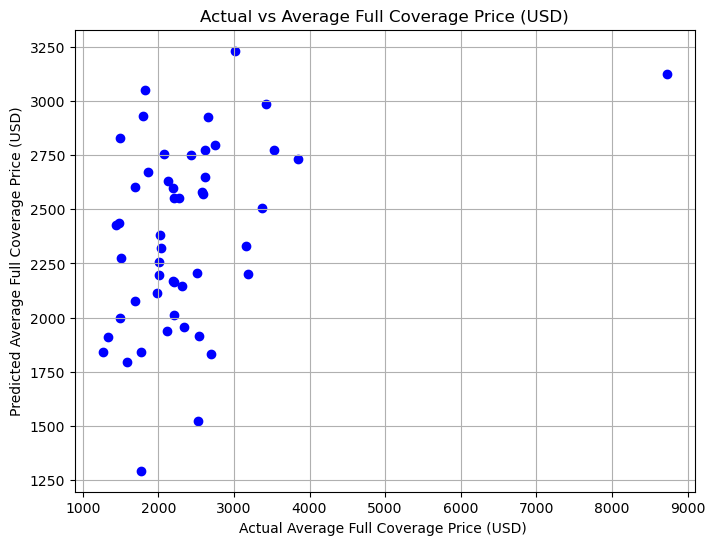

In [106]:
#plotting predictions against real values:
y_pred = lm.predict(X)

# Plotting the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, color='blue')
plt.xlabel('Actual Average Full Coverage Price (USD) ')
plt.ylabel('Predicted Average Full Coverage Price (USD)')
plt.title('Actual vs Average Full Coverage Price (USD)')
plt.grid(True)
plt.show()


In [107]:
#storing coefficient prices for later
full_price_coef = lm.coef_ 
full_price_coef

array([ -6.12267554, -12.47817943, -13.0409377 ,   4.6105393 ,
       -29.35522621,  13.46551272,   0.66532466])

Next, we run the same regression on minimum coverage prices to see if the independent variables are more effective or less effective in predicting them, as well as if the magnitude of the coefficients change.
Our hypothesis is that since minimum insurance coverage entails less risk for insurance companies, the aggregate data we have will not be as effective in predicting it, similarly the magnitude of the variable coefficients will not be as large.

In [108]:
y2 = plotting_data["minimum_coverage"]
#defining model
lm2 = linear_model.LinearRegression()
#fitting model
lm2.fit(X, y2)

LinearRegression()

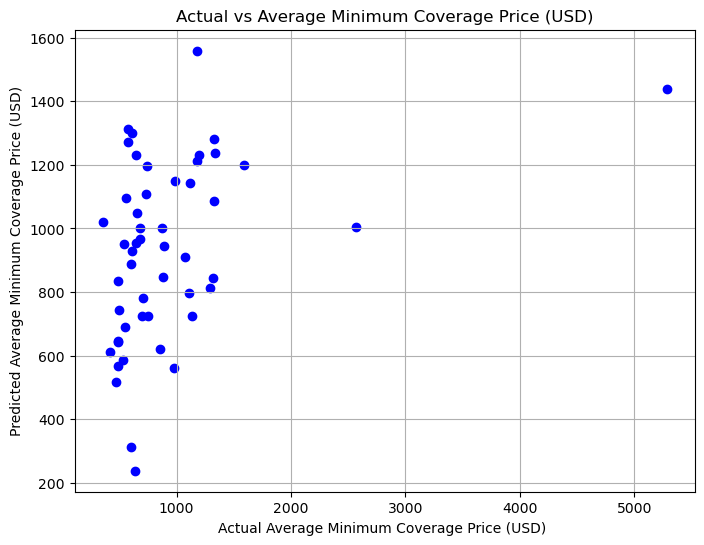

In [109]:
#Plotting predicted values against actual values:
y_pred2 = lm2.predict(X)

# Plotting the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y2, y_pred2, color='blue')
plt.xlabel('Actual Average Minimum Coverage Price (USD) ')
plt.ylabel('Predicted Average Minimum Coverage Price (USD)')
plt.title('Actual vs Average Minimum Coverage Price (USD)')
plt.grid(True)
plt.show()

In [110]:
minimum_price_coef = lm2.coef_ #saving coefficients for later use
minimum_price_coef

array([-19.30999372,  -7.86622625, -13.09747109,   3.68326022,
       -17.1157588 ,   8.35075271,   0.17044055])

<h3>Part 2: Regression with no outliers</h3>

It is observed that Michigan's full coverage & minimum coverage prices are more than 2 times higher than the prices of the second ranking state (Rhode Island). The existence of outliers may skew the coefficients of the linear regression. The following regression model will run on the dataset without Michigan to observe the coefficients without the presence of the outlier.

In [120]:
#remove the outlier:
no_outliers = plotting_data.drop("Car Insurance Premiums ($)", axis = 1).drop("Michigan")
no_outliers.head()



,state,rank,full_coverage,minimum_coverage,difference,Number of drivers involved in fatal collisions per billion miles,Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding,Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired,Percentage Of Drivers Involved In Fatal Collisions Who Were Not Distracted,Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents,Losses incurred by insurance companies for collisions per insured driver ($),stolen_cars_per_100k
State,,,,,,,,,,,,
Alabama,Alabama,31,2078.0,736.0,1342.0,18.8,39.0,30.0,96.0,80.0,145.08,256.5
Alaska,Alaska,45,1502.0,485.0,1016.0,18.1,41.0,25.0,90.0,94.0,133.93,357.7
Arizona,Arizona,11,2699.0,980.0,1719.0,18.6,35.0,28.0,84.0,96.0,110.35,249.4
Arkansas,Arkansas,24,2213.0,677.0,1536.0,22.4,18.0,26.0,94.0,95.0,142.39,245.9
California,California,39,1804.0,574.0,1230.0,12.0,35.0,28.0,91.0,89.0,165.63,358.8


In [121]:
#regression on full coverage price - no outlier:
y3 = no_outliers["full_coverage"]
X1 = no_outliers.iloc[:,5:]

#defining model
lm3 = linear_model.LinearRegression()
#fitting model
lm3.fit(X1, y3)

LinearRegression()

In [122]:
full_price_coef2 = lm3.coef_ #saving coefficients for later use
full_price_coef2

array([ 3.90953079, -4.35613786,  4.00856063,  1.32473901,  4.58900963,
        9.91728854,  0.41215145])

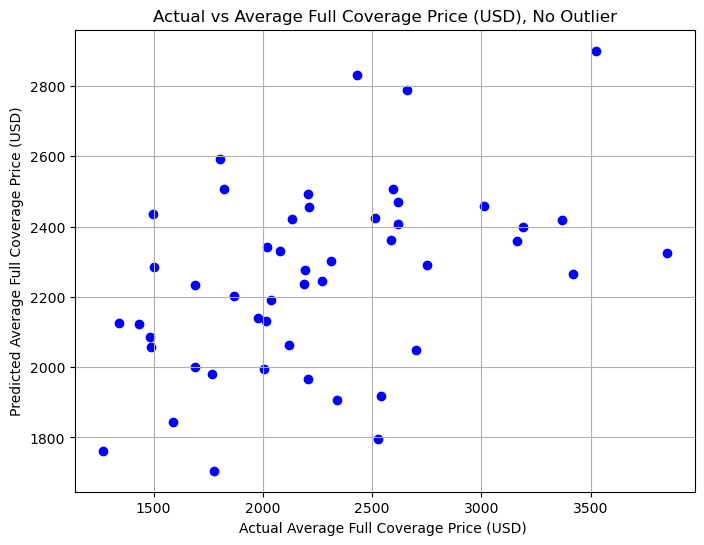

In [123]:
#Plotting predicted values against actual values - no outlier:
y_pred3 = lm3.predict(X1)

# Plotting the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y3, y_pred3, color='blue')
plt.xlabel('Actual Average Full Coverage Price (USD) ')
plt.ylabel('Predicted Average Full Coverage Price (USD)')
plt.title('Actual vs Average Full Coverage Price (USD), No Outlier')
plt.grid(True)
plt.show()

In [124]:
#linear regression model on Minimum-coverage insurance - no outlier
y4 = no_outliers["minimum_coverage"]


#defining model
lm4 = linear_model.LinearRegression()
#fitting model
lm4.fit(X1, y4)


LinearRegression()

In [125]:
minimum_price_coef2 = lm3.coef_ #saving coefficients for later use
minimum_price_coef2

array([ 3.90953079, -4.35613786,  4.00856063,  1.32473901,  4.58900963,
        9.91728854,  0.41215145])

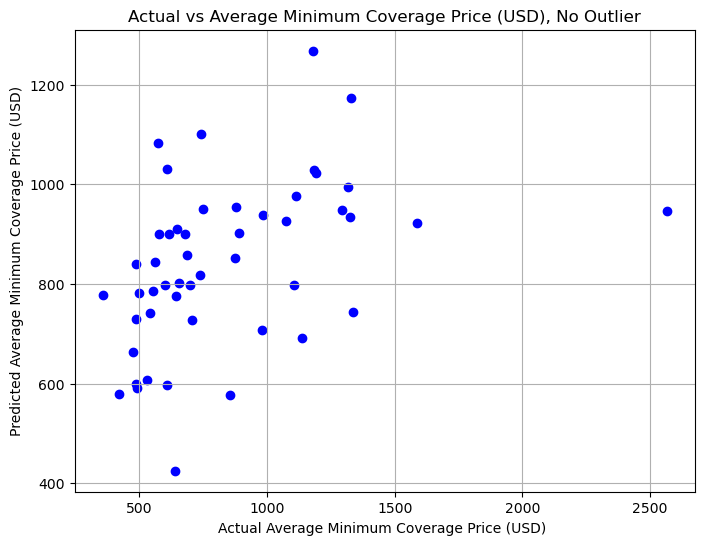

In [126]:
#Plotting predicted values against actual values - no outlier:
y_pred4 = lm4.predict(X1)

# Plotting the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y4, y_pred4, color='blue')
plt.xlabel('Actual Average Minimum Coverage Price (USD) ')
plt.ylabel('Predicted Average Minimum Coverage Price (USD)')
plt.title('Actual vs Average Minimum Coverage Price (USD), No Outlier')
plt.grid(True)
plt.show()

<h3>Part 3: Comparing results</h3>

In [96]:
# #construct summary table:
# #list of independent variable names:
var_names = list(X)
var_names


['Number of drivers involved in fatal collisions per billion miles',
 'Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding',
 'Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired',
 'Percentage Of Drivers Involved In Fatal Collisions Who Were Not Distracted',
 'Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents',
 'Car Insurance Premiums ($)',
 'Losses incurred by insurance companies for collisions per insured driver ($)',
 'stolen_cars_per_100k']

<h1>Conclusion</h1>

<h1>References</h1>